In [15]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [34]:
# number of hidden layer 
H = 50
BATCH_SIZE = 100
DROP_OUT_RATE = 0.5
INPUT_DIM = 28*28

In [35]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape,stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.zeros(shape)
    return tf.Variable(initial)

In [36]:
graph = tf.Graph()
with graph.as_default():
    # input data
    x = tf.placeholder(tf.float32, shape=[None,784])

    # initial variable and bias
    w1 = weight_variable([INPUT_DIM,H])
    b1 = bias_variable([H])

    # hidden layer: h
    # softsign(x) = x / (abs(x)+1)
    h = tf.nn.softsign(tf.matmul(x,w1)+b1)
    keep_prob = tf.placeholder("float",shape=[])
    h_drop = tf.nn.dropout(h,keep_prob)

    # define output layer
    # here, w2 is the transpose of w1
    w2 = tf.transpose(w1)
    b2 = bias_variable([INPUT_DIM])
    y = tf.nn.sigmoid(tf.matmul(h_drop,w2)+b2)

    # loss funtion: L2_loss
    loss = tf.nn.l2_loss(y-x)/ BATCH_SIZE

    # Learning monitoring
    tf.scalar_summary("loss",loss)

    # optimizer
    optimizer = tf.train.AdamOptimizer().minimize(loss)

initialized
89.5237
38.7466
35.0847
28.8098
25.6245
23.5359
21.3421
20.0538
20.5725
18.2383
17.4667
17.1552
16.3903
15.5827
15.3951
14.5378
14.9551
15.6828
13.6206
14.3235


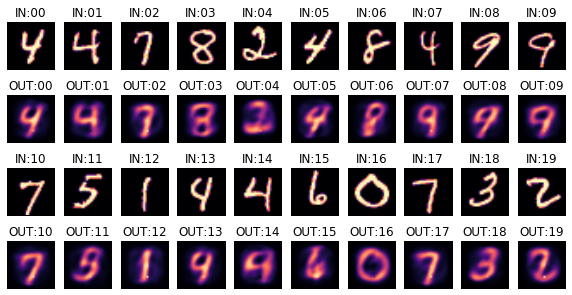

In [37]:
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
loss_value_array=[]
with tf.Session(graph=graph,config=tf.ConfigProto(allow_soft_placement=True,log_device_placement=True,gpu_options=gpu_options)) as sess:
    init = tf.initialize_all_variables()
    
    sess.run(init)
    summary_writer = tf.train.SummaryWriter('summary/l2_loss', graph_def=sess.graph_def)

    print("initialized")
    #train
    for step in range(2000):
        batch_xs, batch_ys = mnist.train.next_batch(BATCH_SIZE)
        sess.run(optimizer,feed_dict={x:batch_xs,keep_prob:DROP_OUT_RATE})
#         # Collect Summary
#         summary_op = tf.merge_all_summaries()
#         summary_str = sess.run(summary_op, feed_dict={x: batch_xs, keep_prob:1.0})
#         summary_writer.add_summary(summary_str, step)
        # Print Progress
        loss_value = loss.eval(session=sess, feed_dict={x: batch_xs, keep_prob: 1.0})
        loss_value_array.append(loss_value)
        if step % 100 == 0:
            print(loss_value)
    # Draw Encode/Decode Result
    N_COL = 10
    N_ROW = 2
    plt.figure(figsize=(N_COL, N_ROW*2.5))
    batch_xs, _ = mnist.train.next_batch(N_COL*N_ROW)
    for row in range(N_ROW):
        for col in range(N_COL):
            i = row*N_COL + col
            data = batch_xs[i:i+1]

            # Draw Input Data(x)
            plt.subplot(2*N_ROW, N_COL, 2*row*N_COL+col+1)
            plt.title('IN:%02d' % i)
            plt.imshow(data.reshape((28, 28)), cmap="magma", clim=(0, 1.0), origin='upper')
            plt.tick_params(labelbottom="off")
            plt.tick_params(labelleft="off")

            # Draw Output Data(y)
            plt.subplot(2*N_ROW, N_COL, 2*row*N_COL + N_COL+col+1)
            plt.title('OUT:%02d' % i)
            y_value = y.eval(session=sess, feed_dict={x: data, keep_prob: 1.0})
            plt.imshow(y_value.reshape((28, 28)), cmap="magma", clim=(0, 1.0), origin='upper')
            plt.tick_params(labelbottom="off")
            plt.tick_params(labelleft="off")

    plt.savefig("result.png")
    plt.show()

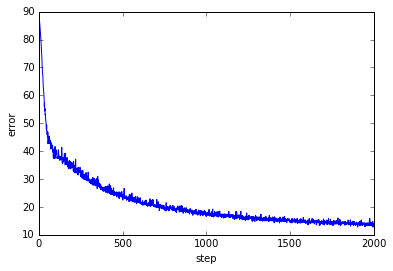

In [38]:
size = len(loss_value_array)
step = np.arange(size)
plt.plot(step,loss_value_array)
plt.xlabel("step")
plt.ylabel("error")

In [18]:
from PIL import Image

In [19]:
import matplotlib.image as mpimg

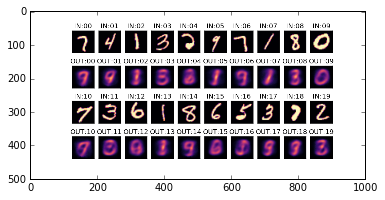

In [22]:
img = mpimg.imread("result.png")
plt.imshow(img)